In [1]:


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import math

import seaborn as sns
%matplotlib inline



data = pd.read_csv("./BankChurners.csv")


In [2]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data.drop('CLIENTNUM',axis=1,inplace=True)

In [4]:


data["Attrition_Flag"].replace({"Existing Customer":0,
                            "Attrited Customer":1,
                            },inplace=True)

data["Gender"].replace({"F":1, "M":0},inplace=True)
data["Card_Category"].replace({"Blue":0,
                                 "Silver":1,
                                 "Gold":2,
                                 "Platinum":3,
                                 },inplace=True)

data["Education_Level"].replace({"Unknown":np.nan,
                                "Graduate":0,
                                "Post-Graduate":1,
                                "Uneducated":2,
                                "College":3,
                                "Doctorate":4,
                                "High School":5,
                                 },inplace=True)

data["Income_Category"].replace({"Unknown":np.nan,
                                "Less than $40K":0,
                                "$40K - $60K":1,
                                "$60K - $80K":2,
                                "$80K - $120K":3,
                                "$120K +":4,
                                 },inplace=True)

data["Marital_Status"].replace({"Unknown":np.nan,
                                "Married":0,
                                "Single":1,
                                "Divorced":2,
                                 },inplace=True)


In [5]:
# 범주형 데이터

data_cate = data[['Attrition_Flag','Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
data_cate

,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category
0,0,0,0.0,5.0,2.0,0
1,0,1,1.0,0.0,0.0,0
2,0,0,0.0,0.0,3.0,0
3,0,1,NaN,5.0,0.0,0
4,0,0,0.0,2.0,2.0,0
...,...,...,...,...,...,...
10122,0,0,1.0,0.0,1.0,0
10123,1,0,2.0,NaN,1.0,0
10124,1,1,0.0,5.0,0.0,0
10125,1,0,NaN,0.0,1.0,0


In [6]:
# 대표값 이용 결측치 대체

from sklearn.impute import SimpleImputer


# 각 데이터에 사용할 인스턴스 생성ㅠ

SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 최빈값

SI_mean = SimpleImputer(strategy = 'mean') # 대표값 평균

In [7]:
# 학습

SI_mode.fit(data_cate)
data_finish_cate = pd.DataFrame(SI_mode.transform(data_cate),
                            columns = data_cate.columns)
data_finish_cate

SimpleImputer(strategy='most_frequent')

,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category
0,0.0,0.0,0.0,5.0,2.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,1.0,0.0,5.0,0.0,0.0
4,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...
10122,0.0,0.0,1.0,0.0,1.0,0.0
10123,1.0,0.0,2.0,0.0,1.0,0.0
10124,1.0,1.0,0.0,5.0,0.0,0.0
10125,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data_cont = data.drop(['Attrition_Flag','Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)
data_cont.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# 수치형 변수 중에 drop시킨 변수를 제외한 나머지 변수들을 모은 리스트를 만든다.
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Total_Amt_Chng_Q4_Q1', 
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'] 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for numeric in Numerics:
    data_cont[numeric] = scaler.fit_transform(data_cont[numeric].values.reshape(-1,1))
    
data_cont

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,11914.0,2.623494,1144,-0.973895,3.834003,0.061
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,7392.0,3.563293,1291,-1.357340,12.608573,0.105
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,3418.0,8.367214,1887,-1.911206,6.807864,0.000
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,796.0,2.942843,1171,-1.911206,6.807864,0.760
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,4716.0,6.455682,816,-1.570365,7.509325,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2152.0,-0.259771,15476,2.221481,0.608119,0.462
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,2091.0,0.201004,8764,0.176440,-0.122745,0.511
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,5409.0,0.269436,10291,-0.207005,0.444305,0.000
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,5281.0,-1.026208,8395,-0.121795,0.041070,0.000


In [11]:
df = pd.concat([data_finish_cate,data_cont],axis=1)
df_1 =pd.concat([data_finish_cate,data_cont],axis=1)

In [12]:
df

,Attrition_Flag,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,0.0,0.0,5.0,2.0,0.0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,11914.0,2.623494,1144,-0.973895,3.834003,0.061
1,0.0,1.0,1.0,0.0,0.0,0.0,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,7392.0,3.563293,1291,-1.357340,12.608573,0.105
2,0.0,0.0,0.0,0.0,3.0,0.0,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,3418.0,8.367214,1887,-1.911206,6.807864,0.000
3,0.0,1.0,0.0,5.0,0.0,0.0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,796.0,2.942843,1171,-1.911206,6.807864,0.760
4,0.0,0.0,0.0,2.0,2.0,0.0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,4716.0,6.455682,816,-1.570365,7.509325,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.0,1.0,0.0,1.0,0.0,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,2152.0,-0.259771,15476,2.221481,0.608119,0.462
10123,1.0,0.0,2.0,0.0,1.0,0.0,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,2091.0,0.201004,8764,0.176440,-0.122745,0.511
10124,1.0,1.0,0.0,5.0,0.0,0.0,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,5409.0,0.269436,10291,-0.207005,0.444305,0.000
10125,1.0,0.0,0.0,0.0,1.0,0.0,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,5281.0,-1.026208,8395,-0.121795,0.041070,0.000


In [13]:
# 타겟값 저장


df_target = df['Attrition_Flag']

In [14]:
df.drop('Attrition_Flag',axis=1,inplace=True)

In [15]:
from sklearn.cluster import KMeans


In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)
# labels_속성을 통해 각 데이터 포인트별로 할당된 군집 중심점을 확인
print(kmeans.labels_)



KMeans(n_clusters=5, random_state=0)

[4 4 1 ... 2 1 2]


In [17]:
# 동일한 데이터로 예측했으므로 labels_와 같은 결과가 나옴
print(kmeans.predict(df))

[4 4 1 ... 2 1 2]


In [18]:
df['Attrition_Flag']= df_target
df['Cluster']=kmeans.labels_

In [19]:
df.head()

,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Cluster
0,0.0,0.0,5.0,2.0,0.0,-0.165406,0.503368,0.384621,0.763943,-1.327136,...,0.446622,-0.473422,11914.0,2.623494,1144,-0.973895,3.834003,0.061,0.0,4
1,1.0,1.0,0.0,0.0,0.0,0.333570,2.043199,1.010715,1.407306,-1.327136,...,-0.041367,-0.366667,7392.0,3.563293,1291,-1.357340,12.608573,0.105,0.0,4
2,0.0,0.0,0.0,3.0,0.0,0.583058,0.503368,0.008965,0.120579,-1.327136,...,-0.573698,-1.426858,3418.0,8.367214,1887,-1.911206,6.807864,0.000,0.0,1
3,1.0,0.0,5.0,0.0,0.0,-0.789126,1.273283,-0.241473,-0.522785,1.641478,...,-0.585251,1.661686,796.0,2.942843,1171,-1.911206,6.807864,0.760,0.0,1
4,0.0,0.0,2.0,2.0,0.0,-0.789126,0.503368,-1.869317,0.763943,-1.327136,...,-0.430877,-1.426858,4716.0,6.455682,816,-1.570365,7.509325,0.000,0.0,1


In [20]:
# target과 cluster값 갯수 비교

df_result = df.groupby(['Attrition_Flag','Cluster']).count()
print(df_result)

                        Gender  Marital_Status  Education_Level  \
Attrition_Flag Cluster                                            
0.0            0           834             834              834   
               1          4873            4873             4873   
               2           544             544              544   
               3           680             680              680   
               4          1569            1569             1569   
1.0            0           132             132              132   
               1           988             988              988   
               2            31              31               31   
               3           135             135              135   
               4           341             341              341   

                        Income_Category  Card_Category  Customer_Age  \
Attrition_Flag Cluster                                                 
0.0            0                    834            

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_1)

In [22]:
df['pca_x']=pca_transformed[:,0] #첫번째 값(X 좌표)
df['pca_y']=pca_transformed[:,1] #첫번째 값(y 좌표)
df.head(3)

,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Cluster,pca_x,pca_y
0,0.0,0.0,5.0,2.0,0.0,-0.165406,0.503368,0.384621,0.763943,-1.327136,...,11914.0,2.623494,1144,-0.973895,3.834003,0.061,0.0,4,4200.336186,-3569.611149
1,1.0,1.0,0.0,0.0,0.0,0.333570,2.043199,1.010715,1.407306,-1.327136,...,7392.0,3.563293,1291,-1.357340,12.608573,0.105,0.0,4,-299.573066,-3099.598741
2,0.0,0.0,0.0,3.0,0.0,0.583058,0.503368,0.008965,0.120579,-1.327136,...,3418.0,8.367214,1887,-1.911206,6.807864,0.000,0.0,1,-4220.774995,-2220.926327


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

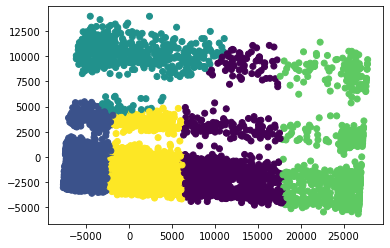

In [27]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'], c=df['Cluster'])

In [25]:
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(df,labels)))

NameError: name 'labels' is not defined